In [2]:
import sys
import numpy as np
import os.path as osp
import tensorflow as tf
import glob
import matplotlib.pylab as plt

import tf_lab.point_clouds.in_out as pio
from tf_lab.point_clouds.in_out import PointCloudDataSet
from tf_lab.point_clouds.point_net_ae import PointNetAutoEncoder
from tf_lab.point_clouds.autoencoder import Configuration as Conf

from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id

from general_tools.notebook.tf import reset_tf_graph                                              
from general_tools.in_out.basics import create_dir, delete_files_in_directory, files_in_subdirs
from general_tools.simpletons import select_first_last_and_k, indices_in_iterable

from geo_tool import Point_Cloud

from tf_lab.nips.shape_net import pc_loader as sn_pc_loader

from tf_lab.autopredictors.exploration import latent_embedding_of_entire_dataset

from tf_lab.autopredictors.evaluate import eval_model, read_saved_epochs

from tf_lab.nips.evaluate_gan import entropy_of_occupancy_grid, point_cloud_distances,\
                                     jensen_shannon_divergence, sample_pclouds_distances

from general_tools.strings import trim_content_after_last_dot

from general_tools.plotting import stack_images_in_square_grid

from tf_lab.nips.helper import pclouds_centered_and_half_sphere, zero_mean_half_sphere
import scipy.stats as stats

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [836]:
n_pc_samples = 2048
ae_loss = 'chamfer'
class_name = 'chair'
ae_gan = True
epoch = 50

In [837]:
if ae_gan:
    ae_tag = 'ae_' + ae_loss + '_' + class_name + '_' + str(n_pc_samples) + '_pts'
    top_in = osp.join('/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/', ae_tag)
    in_f = osp.join(top_in, 'epoch_' + str(epoch) + '.npz')
    our_data = np.load(in_f)
    our_data = our_data[our_data.keys()[0]]
    

rids = []
top_out_d = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/for_paper_syn_data/ours/'
out_dir = create_dir(osp.join(top_out_d, ae_tag, 'epoch_' + str(epoch) ))

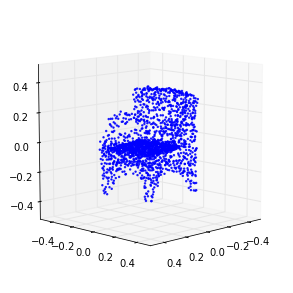

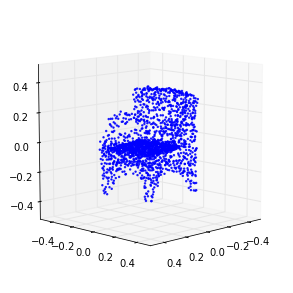

In [926]:
rid = np.random.randint(len(our_data))
Point_Cloud(our_data[rid]).plot(in_u_sphere=True, azim=45)

In [903]:
# Hit if you like it!
rids.append(rid)
rids 

[1514, 3328, 5755, 5660, 3112]

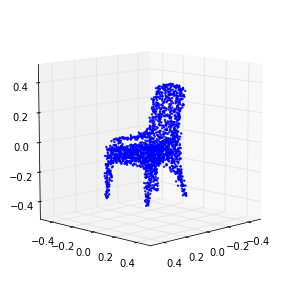

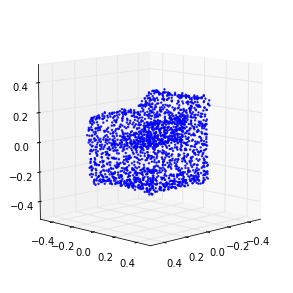

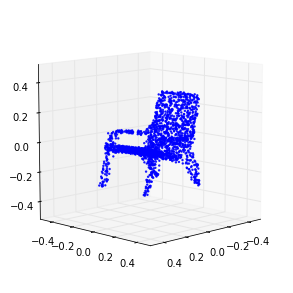

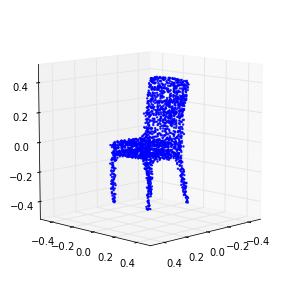

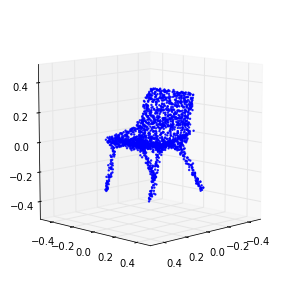

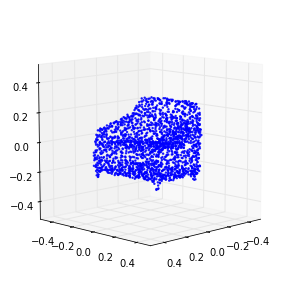

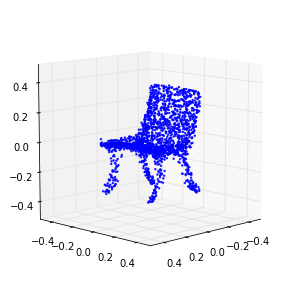

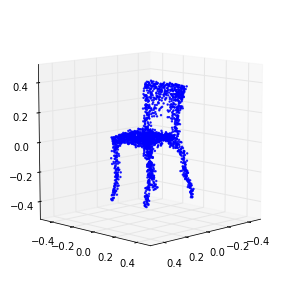

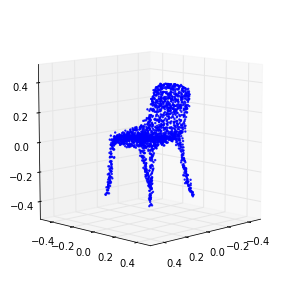

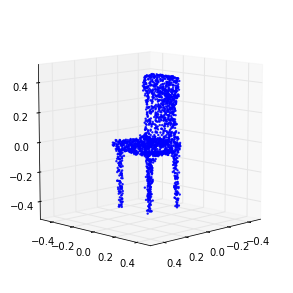

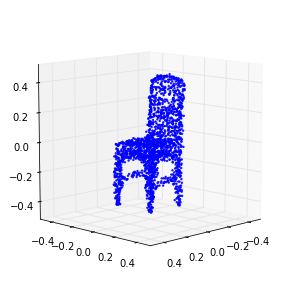

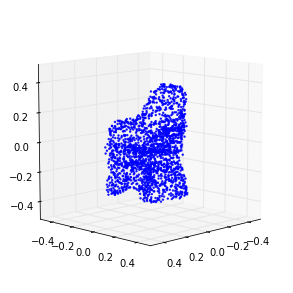

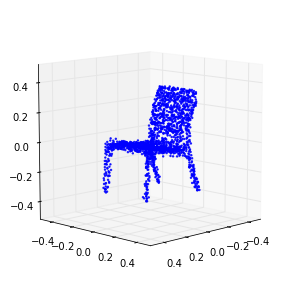

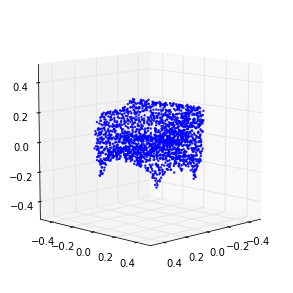

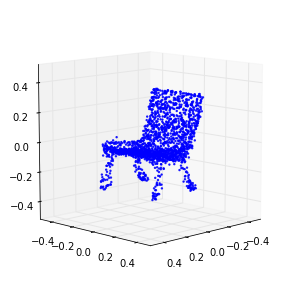

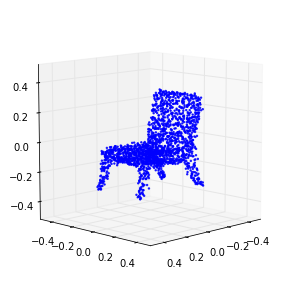

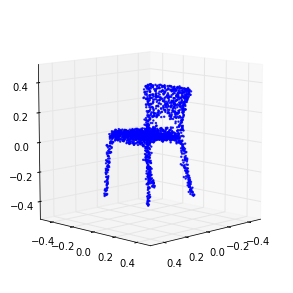

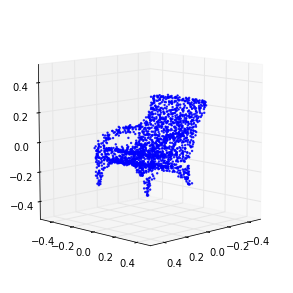

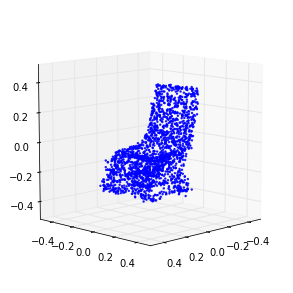

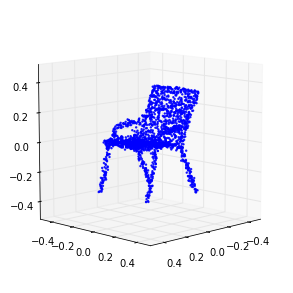

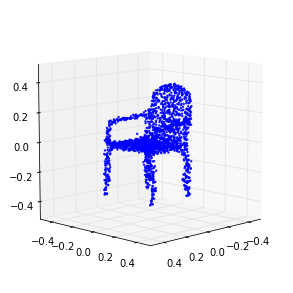

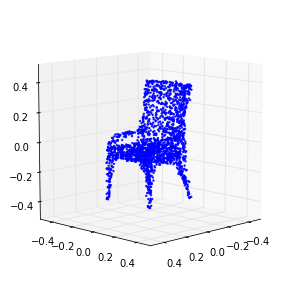

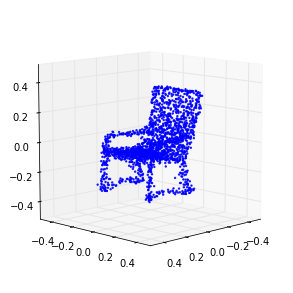

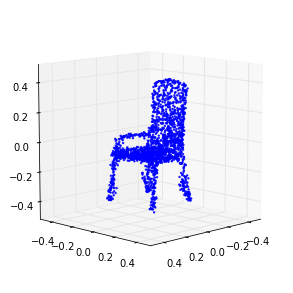

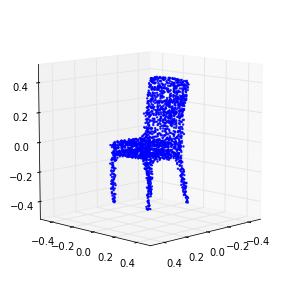

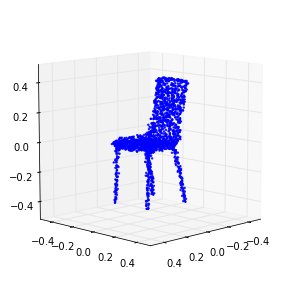

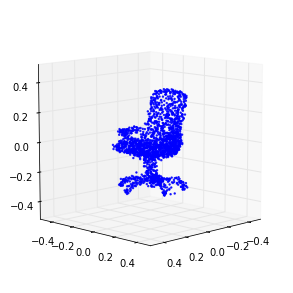

In [835]:
for i, d in enumerate(our_data[rids]):
    fig = Point_Cloud(d).plot(azim=45, in_u_sphere=True)    
    fig.savefig(osp.join(out_dir, str(i) + '.png'))
    np.savetxt(osp.join(out_dir, 'pc_' + str(i)), d)
    

In [423]:
out_dir

'/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/for_paper_syn_data/ours/ae_emd_chair_2048_pts/epoch_5'